**Cancer set Classification with Tensorflow** as an excuse to identify and deal with overfitting using Early Stopping Callbacks and Dropout Layers

**Early Stopping**  
- Keras can automatically stop training based on a loss condition on the validation data passed in during the model.fit() call  

**Dropout Layers**
- Dropouts that can be added to Layers to "turn off" neurons during training to prevent overfitting
- will "drop" a used-defined percentage of neuron units in the previous layer of every batch

In [2]:
# Must run another "shift enter" run to complete the imports
# Science imports
import pandas as pd
import numpy as np

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default.
sns.set_style("darkgrid") # set a grey grid as a background

# turn off warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('TensorFlow_FILES/DATA/cancer_classification.csv')

In [5]:
# apparently no nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [16]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [7]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


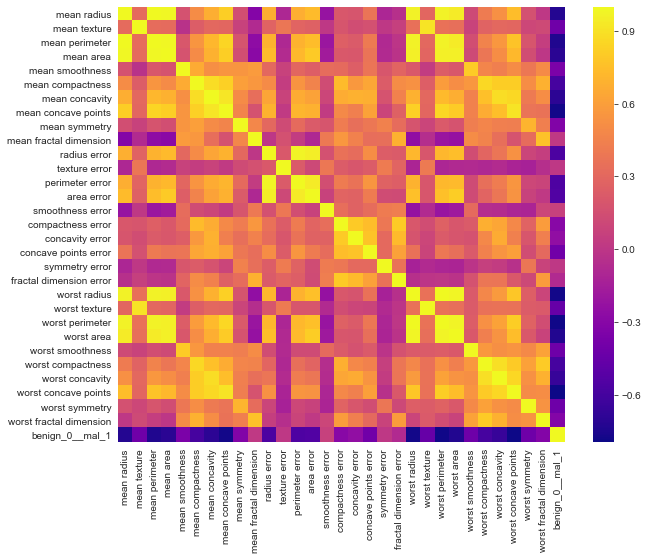

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='plasma')

In [23]:
df.benign_0__mal_1.value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

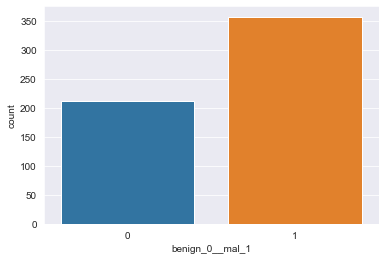

In [22]:
# Since this is classification, do a countplot of the actual label to get the number of instances per label
# "is this a well balanced problem or not?"
# more cases of malignant than benign, but relatively well balanced (212, 357)
sns.countplot(x='benign_0__mal_1',data=df)

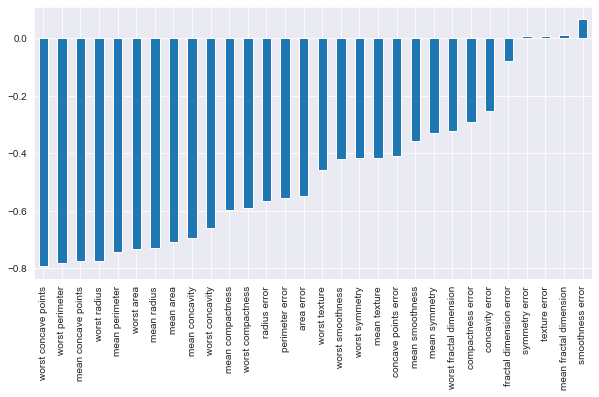

In [33]:
# plot out the correlation for the 
plt.figure(figsize=(10,5))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

#### Train/Test split the data

In [63]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [38]:
from sklearn.model_selection import train_test_split

In [64]:
#train_test_split() - use shift tab to get the docstring
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

In [66]:
# scale the data
# training data needs fit/transform, test data just needs transform
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### create the model

In [48]:
# importing models and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [67]:
# what's the shape?
X_train.shape

(426, 30)

In [68]:
model = Sequential()

In [69]:
# Output activation must be sigmoid since this is a binary classification problem
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # output neuron
# since this is binary the loss function is binary_crossentropy
model.compile(loss='binary_crossentropy',optimizer='adam')

In [70]:
# fitting the model
# using a large epoch number of epochs to force an overfit
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),verbose=0)

In [71]:
# load the lss and validator_loss into a dataframe
lossdf = pd.DataFrame(model.history.history)

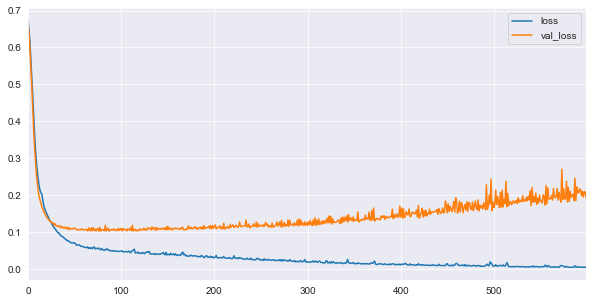

In [72]:
# notice that validator loss is way above the loss - this shows overfitted data, diverging around 25 epochs
lossdf.plot(figsize=(10,5))

### using Callbacks and Early Stopping to stop before overfitting occurs

First - remake the model

then choose a metric to track with 'monitor=', we use val_loss. Can also config min_delta (minimum change required) and patience (number of epochs with no improvement before stopping)

Modes - if we are tracking Accuracy we want to maximize (max), with Loss (the reverse of accuracy) we want to minimize (min). There's also 'auto' (infer the mode). 

If we have a loss of 0, we have a perfect fit.

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

In [75]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=0)

In [76]:
model = Sequential()
# Output activation must be sigmoid since this is a binary classification problem
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # output neuron
# since this is binary the loss function is binary_crossentropy
model.compile(loss='binary_crossentropy',optimizer='adam')



In [77]:
# fit the model
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),verbose=0,
         callbacks=[early_stop])

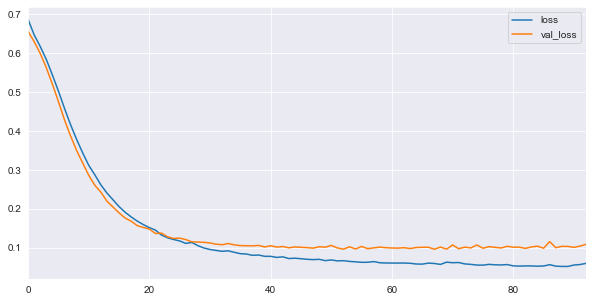

In [78]:
#
lossdf2 = pd.DataFrame(model.history.history)
#
lossdf2.plot(figsize=(10,5))

### Adding in Dropout Layers

In [79]:
from tensorflow.keras.layers import Dropout

In [80]:
model = Sequential()
# Output activation must be sigmoid since this is a binary classification problem
model.add(Dense(30,activation='relu'))
# configure the rate of drop: using 0 means no drop, 1 is all drops. Commonly .2 and .5.
model.add(Dropout(0.5)) # %50 probability of being dropped
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5)) # %50 probability of being dropped
model.add(Dense(1,activation='sigmoid')) # output neuron
# since this is binary the loss function is binary_crossentropy
model.compile(loss='binary_crossentropy',optimizer='adam')

In [81]:
# fit the model. combine with early stopping
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),verbose=1,
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.7248 - val_loss: 0.6855
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6848 - val_loss: 0.6672
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6768 - val_loss: 0.6478
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6541 - val_loss: 0.6274
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6330 - val_loss: 0.6056
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6193 - val_loss: 0.5777
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5811 - val_loss: 0.5463
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5659 - val_loss: 0.5194
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5422 - val_loss: 0.4936
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5468 - val_loss: 0.4686
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.1219 - val_loss: 0.1277
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1239 - val_loss: 0.1101
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0863 - val_loss: 0.1001
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0925 - val_loss: 0.1124
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1187 - val_loss: 0.0969
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1094 - val_loss: 0.1112
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1154 - val_loss: 0.1065
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1206 - val_loss: 0.1015
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0972 - val_loss: 0.1097
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0947 - val_loss: 0.1008
Epoch 93/600


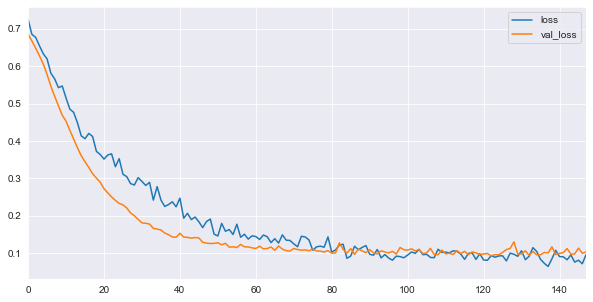

In [82]:
# far superior
lossdf3 = pd.DataFrame(model.history.history)
#
lossdf3.plot(figsize=(10,5))

### Prediction on Category Classification



In [84]:
# classification uses predict_classes
predictions = model.predict_classes(X_test)

In [85]:
from sklearn.metrics import classification_report, confusion_matrix


In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [98]:
# shows that the network only misclassified one point in the test data
# True Negatives, False Positives
# False Negatives, True Positives
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
print(confusion_matrix(y_test,predictions))
print('True Negatives',tn,'False Positives',fp,'False Negatives',fn,'True Positives',tp)

[[54  1]
 [ 3 85]]
True Negatives 54 False Positives 1 False Negatives 3 True Positives 85
